# 1. Import dataset

In [6]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107730 sha256=92b94c27cb4801325ef8141427c93ab937f0eec395412cd2f133e9b062b351bf
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("patientml.csv")
df = df.rename(columns = {'DEGREE_CENTRALITY':'Degree Centrality', 'EIGENVECTOR':'Eigenvector Centrality ', 'CLOSENESS_CENTRALITY': 'Closeness Centrality', 'BETWEENNESS_CENTRALITY' :'Betweenness Centrality', 'CLUSTCOEF': 'Clustering Coefficient', 'gender':'Gender', 'age':'Age', 'smoker':'Smoking'})

In [3]:
df.head()

,ID,Degree centrality,Eigenvector,Closness centrality,Betweeness Centrality,Clustering coefficient,Gender,Age,Smoking,Outcome
0,200132255,0.000973,0.000005,0.263413,0.000000,1.000000,1,0.504348,1,0
1,7673,0.004380,0.000421,0.333830,0.000000,1.000000,1,0.573913,1,1
2,200066270,0.056448,0.004889,0.415296,0.000659,0.666417,0,0.695652,0,0
3,140445,0.008759,0.000841,0.365491,0.000047,0.777778,1,0.347826,0,0
4,115693,0.006813,0.000098,0.319032,0.002725,0.560440,0,0.391304,1,0


# 2. Data Pre-processing

In [4]:
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1:]

## 2.1 Train Test split

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=2)
feature_names = X_test.columns.tolist()



# 3 Models

## 3.1 LR

In [9]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
#from sklearn.metrics import plot_confusion_matrix
import numpy as np


# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=2, shuffle=True)
# create model
LR = LogisticRegression()
# evaluate model
scores = cross_val_score(LR, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy for training: %.4f (%.4f)' % (mean(scores), std(scores)))


y_train=np.ravel(y_train)
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
print('Accuracy for testing ', accuracy_score(y_test, y_pred))

cf_matrix_LR = confusion_matrix(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))

#plot_confusion_matrix(LR, X_test, y_test)
plt.show()

Accuracy for training: 0.7348 (0.0375)
Accuracy for testing  0.7427184466019418
[[151  62]
 [ 44 155]]
              precision    recall  f1-score   support

           0     0.7744    0.7089    0.7402       213
           1     0.7143    0.7789    0.7452       199

    accuracy                         0.7427       412
   macro avg     0.7443    0.7439    0.7427       412
weighted avg     0.7453    0.7427    0.7426       412



In [10]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [11]:
from sklearn.inspection import permutation_importance
r = permutation_importance(LR, X_test, y_test,
                        n_repeats=30,
                         random_state=0)

r.importances_mean

array([ 3.50323625e-02,  1.16504854e-02,  4.86245955e-02,  0.00000000e+00,
        1.35841424e-01,  2.28964401e-02,  5.13754045e-02, -8.09061489e-05])

In [12]:
import eli5
from eli5.sklearn import PermutationImportance

perm_LR = PermutationImportance(LR, random_state=0).fit(X_test, y_test)
eli5.show_weights(perm_LR, feature_names = X_test.columns.tolist())

Weight,Feature
0.1398 ± 0.0181,Clustering coefficient
0.0529 ± 0.0244,Age
0.0447 ± 0.0231,Closness centrality
0.0408 ± 0.0169,Degree centrality
0.0233 ± 0.0139,Gender
0.0136 ± 0.0109,Eigenvector
0.0005 ± 0.0036,Smoking
0 ± 0.0000,Betweeness Centrality


# 3.2 KNN

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],
          'weights':['uniform','distance'],
         }

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=10)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 12, 'weights': 'uniform'}

In [14]:
from sklearn.neighbors import KNeighborsClassifier


cv = KFold(n_splits=10, random_state=2, shuffle=True)
# create model
KNN = KNeighborsClassifier(n_neighbors=12, weights = "uniform")
# evaluate model
scores = cross_val_score(KNN, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.4f (%.4f)' % (mean(scores), std(scores)))


y_train=np.ravel(y_train)
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)

print('Accuracy for testing ', accuracy_score(y_test, y_pred))

cf_matrix_KNN = confusion_matrix(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))

Accuracy: 0.7738 (0.0323)
Accuracy for testing  0.8131067961165048
[[193  20]
 [ 57 142]]
              precision    recall  f1-score   support

           0     0.7720    0.9061    0.8337       213
           1     0.8765    0.7136    0.7867       199

    accuracy                         0.8131       412
   macro avg     0.8243    0.8098    0.8102       412
weighted avg     0.8225    0.8131    0.8110       412



In [15]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [16]:
import eli5
from eli5.sklearn import PermutationImportance

perm_KNN = PermutationImportance(KNN, random_state=0).fit(X_test, y_test)
eli5.show_weights(perm_KNN, feature_names = X_test.columns.tolist())

Weight,Feature
0.1602 ± 0.0226,Clustering coefficient
0.1117 ± 0.0251,Age
0.0728 ± 0.0213,Closness centrality
0.0427 ± 0.0205,Gender
0.0223 ± 0.0108,Degree centrality
0.0136 ± 0.0136,Smoking
0.0019 ± 0.0036,Eigenvector
0 ± 0.0000,Betweeness Centrality


## 3.3 SVM

In [17]:
from sklearn import svm


cv = KFold(n_splits=10, random_state=2, shuffle=True)
# create model
SVM = svm.SVC(probability=True)
# evaluate model
scores = cross_val_score(SVM, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.4f (%.4f)' % (mean(scores), std(scores)))

y_train=np.ravel(y_train)
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)
accuracy_score(y_test, y_pred)

print('Accuracy for testing ', accuracy_score(y_test, y_pred))

cf_matrix_SVM = confusion_matrix(y_test, y_pred)


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))

Accuracy: 0.7512 (0.0316)
Accuracy for testing  0.7864077669902912
[[169  44]
 [ 44 155]]
              precision    recall  f1-score   support

           0     0.7934    0.7934    0.7934       213
           1     0.7789    0.7789    0.7789       199

    accuracy                         0.7864       412
   macro avg     0.7862    0.7862    0.7862       412
weighted avg     0.7864    0.7864    0.7864       412



In [18]:
import eli5
from eli5.sklearn import PermutationImportance

perm_SVM = PermutationImportance(SVM, random_state=0).fit(X_test, y_test)
eli5.show_weights(perm_SVM, feature_names = X_test.columns.tolist())

Weight,Feature
0.1607 ± 0.0207,Clustering coefficient
0.1053 ± 0.0343,Age
0.0723 ± 0.0099,Closness centrality
0.0417 ± 0.0135,Gender
0.0272 ± 0.0155,Degree centrality
0.0155 ± 0.0050,Eigenvector
0.0117 ± 0.0149,Smoking
0 ± 0.0000,Betweeness Centrality


## 3.4 NB

In [19]:
from sklearn.naive_bayes import GaussianNB
cv = KFold(n_splits=10, random_state=2, shuffle=True)


NB = GaussianNB()
# evaluate model
scores = cross_val_score(NB, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.4f (%.4f)' % (mean(scores), std(scores)))

y_train=np.ravel(y_train)
NB.fit(X_train,y_train)
y_pred = NB.predict(X_test)
accuracy_score(y_test, y_pred)

print('Accuracy for testing ', accuracy_score(y_test, y_pred))

cf_matrix_NB = confusion_matrix(y_test, y_pred)


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))

Accuracy: 0.6473 (0.0396)
Accuracy for testing  0.6529126213592233
[[192  21]
 [122  77]]
              precision    recall  f1-score   support

           0     0.6115    0.9014    0.7287       213
           1     0.7857    0.3869    0.5185       199

    accuracy                         0.6529       412
   macro avg     0.6986    0.6442    0.6236       412
weighted avg     0.6956    0.6529    0.6272       412



In [20]:
import eli5
from eli5.sklearn import PermutationImportance

perm_NB= PermutationImportance(NB, random_state=0).fit(X_test, y_test)
eli5.show_weights(perm_NB, feature_names = X_test.columns.tolist())

Weight,Feature
0.0107 ± 0.0265,Eigenvector
0.0092 ± 0.0120,Clustering coefficient
0.0078 ± 0.0078,Closness centrality
0.0068 ± 0.0190,Age
0.0053 ± 0.0036,Betweeness Centrality
-0.0078 ± 0.0036,Smoking
-0.0102 ± 0.0099,Gender
-0.0296 ± 0.0104,Degree centrality


# 3.5 DT

In [21]:
from sklearn.tree import DecisionTreeClassifier

cv = KFold(n_splits=10, random_state=2, shuffle=True)
DT = DecisionTreeClassifier(random_state=1)
scores = cross_val_score(DT, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.4f (%.4f)' % (mean(scores), std(scores)))

y_train=np.ravel(y_train)
DT.fit(X_train,y_train)
y_pred = DT.predict(X_test)
accuracy_score(y_test, y_pred)

print('Accuracy for testing ', accuracy_score(y_test, y_pred))

cf_matrix_DT = confusion_matrix(y_test, y_pred)


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))

Accuracy: 0.7464 (0.0329)
Accuracy for testing  0.808252427184466
[[172  41]
 [ 38 161]]
              precision    recall  f1-score   support

           0     0.8190    0.8075    0.8132       213
           1     0.7970    0.8090    0.8030       199

    accuracy                         0.8083       412
   macro avg     0.8080    0.8083    0.8081       412
weighted avg     0.8084    0.8083    0.8083       412



In [22]:
import eli5
from eli5.sklearn import PermutationImportance

perm_DT= PermutationImportance(DT, random_state=0).fit(X_test, y_test)
eli5.show_weights(perm_DT, feature_names = X_test.columns.tolist())

Weight,Feature
0.2092 ± 0.0520,Closness centrality
0.1476 ± 0.0224,Eigenvector
0.1364 ± 0.0265,Clustering coefficient
0.0981 ± 0.0368,Age
0.0689 ± 0.0225,Degree centrality
0.0218 ± 0.0248,Betweeness Centrality
0.0204 ± 0.0139,Gender
0.0063 ± 0.0050,Smoking


# 3.6 RF

In [27]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=2)

In [28]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [6,7,8,9],
    'criterion' :['gini', 'entropy']
}

In [29]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10)
CV_rfc.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=2),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 500]})

In [31]:
cv = KFold(n_splits=10, random_state=2, shuffle=True)

RF = RandomForestClassifier(criterion='gini', max_depth=8,
                                              max_features='auto',
                                              n_estimators=200, random_state=1)
# evaluate model
scores = cross_val_score(RF,X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.4f (%.4f)' % (mean(scores), std(scores)))

y_train=np.ravel(y_train)
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)
accuracy_score(y_test, y_pred)

print('Accuracy for testing ', accuracy_score(y_test, y_pred))

cf_matrix_RF = confusion_matrix(y_test, y_pred)


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))

Accuracy: 0.8145 (0.0266)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy for testing  0.8519417475728155
[[201  12]
 [ 49 150]]
              precision    recall  f1-score   support

           0     0.8040    0.9437    0.8683       213
           1     0.9259    0.7538    0.8310       199

    accuracy                         0.8519       412
   macro avg     0.8650    0.8487    0.8496       412
weighted avg     0.8629    0.8519    0.8503       412



In [32]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [33]:
import eli5
from eli5.sklearn import PermutationImportance

perm_RF= PermutationImportance(RF, random_state=0).fit(X_test, y_test)
eli5.show_weights(perm_RF, feature_names = X_test.columns.tolist())

Weight,Feature
0.1306 ± 0.0117,Eigenvector
0.0757 ± 0.0207,Betweeness Centrality
0.0563 ± 0.0207,Clustering coefficient
0.0364 ± 0.0087,Closness centrality
0.0345 ± 0.0166,Age
0.0301 ± 0.0198,Gender
0.0019 ± 0.0135,Degree centrality
0.0005 ± 0.0019,Smoking


In [34]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


rf=RandomForestClassifier(criterion='entropy', max_depth=8,
                                              max_features='auto',
                                              n_estimators=200, random_state=1)
rf.fit(X_train, y_train)

print('Training set metrics:')
print('Accuracy:', accuracy_score(y_train, rf.predict(X_train)))
print('Precision:', precision_score(y_train, rf.predict(X_train)))
print('Recall:', recall_score(y_train, rf.predict(X_train)))

print('Test set metrics:')
print('Accuracy:', accuracy_score(y_test, rf.predict(X_test)))
print('Precision:', precision_score(y_test, rf.predict(X_test)))
print('Recall:', recall_score(y_test, rf.predict(X_test)))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Training set metrics:
Accuracy: 0.8777372262773723
Precision: 0.9422535211267605
Recall: 0.8069963811821471
Test set metrics:
Accuracy: 0.8495145631067961
Precision: 0.9202453987730062
Recall: 0.7537688442211056


In [35]:
import matplotlib.pyplot as plt
# Calculate feature importances
importances = RF.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

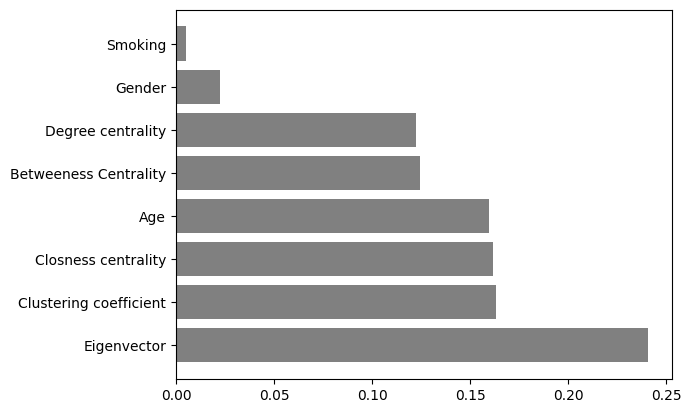

In [36]:
import matplotlib.pyplot as plt
# Calculate feature importances
importances = RF.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Barplot: Add bars
plt.barh(range(X.shape[1]), importances[indices], color='grey')
# Add feature names as x-axis labels
plt.yticks(range(X.shape[1]), names, fontsize = 10)
# Create plot title
#plt.title("Feature Importance")
plt.savefig('Figure5.png', dpi=300, bbox_inches = 'tight')

# Show plot
plt.show()


# 3.7 XGboost

In [90]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import xgboost

In [38]:
from xgboost.sklearn import XGBClassifier
import scipy.stats as st

one_to_left = st.beta(10, 1)
from_zero_positive = st.expon(0, 50)

params = {
    "n_estimators": st.randint(3, 40),
    "max_depth": st.randint(3, 40),
    "learning_rate": st.uniform(0.05, 0.4),
    "colsample_bytree": one_to_left,
    "subsample": one_to_left,
    "gamma": st.uniform(0, 10),
    'reg_alpha': from_zero_positive,
    "min_child_weight": from_zero_positive,
}

xgb = XGBClassifier(nthreads=-1)

In [91]:
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [92]:
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

In [41]:
from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(xgb, params, n_jobs=1, random_state=1)
gs.fit(X_train, y_train)
gs.best_estimator_

[07:02:35] WARNING: ../src/learner.cc:767: 
Parameters: { "nthreads" } are not used.

[07:02:36] WARNING: ../src/learner.cc:767: 
Parameters: { "nthreads" } are not used.

[07:02:36] WARNING: ../src/learner.cc:767: 
Parameters: { "nthreads" } are not used.

[07:02:36] WARNING: ../src/learner.cc:767: 
Parameters: { "nthreads" } are not used.

[07:02:36] WARNING: ../src/learner.cc:767: 
Parameters: { "nthreads" } are not used.

[07:02:37] WARNING: ../src/learner.cc:767: 
Parameters: { "nthreads" } are not used.

[07:02:37] WARNING: ../src/learner.cc:767: 
Parameters: { "nthreads" } are not used.

[07:02:37] WARNING: ../src/learner.cc:767: 
Parameters: { "nthreads" } are not used.

[07:02:38] WARNING: ../src/learner.cc:767: 
Parameters: { "nthreads" } are not used.

[07:02:38] WARNING: ../src/learner.cc:767: 
Parameters: { "nthreads" } are not used.

[07:02:38] WARNING: ../src/learner.cc:767: 
Parameters: { "nthreads" } are not used.

[07:02:38] WARNING: ../src/learner.cc:767: 
Parameters

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.989870219416199, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=4.140559878195683, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.32776006309109806, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=38.89175481553912, missing=nan,
              monotone_constraints=None, n_estimators=16, n_jobs=None,
              nthreads=-1, num_parallel_tree=None, predictor=None, ...)

In [ ]:
"""
####### witout network feature
cv = KFold(n_splits=10, random_state=1, shuffle=True)

model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9692206821226456,
              gamma=0.3142918568673425, learning_rate=0.30456416450551216,
              max_delta_step=0, max_depth=34,
              min_child_weight=59.456851110666285, missing=None,
              n_estimators=39, n_jobs=1, nthread=None, nthreads=-1,
              objective='binary:logistic', random_state=0,
              reg_alpha=14.336941149164916, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=0.898377733005299, verbosity=1)
# evaluate model
scores = cross_val_score(model,X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.4f (%.4f)' % (mean(scores), std(scores)))

y_train=np.ravel(y_train)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

print('Accuracy for testing ', accuracy_score(y_test, y_pred))

cf_matrix_XGBoost = confusion_matrix(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))
"""

Accuracy: 0.6637 (0.0341)
Accuracy for testing  0.6586538461538461
[[106 106]
 [ 36 168]]
              precision    recall  f1-score   support

           0     0.7465    0.5000    0.5989       212
           1     0.6131    0.8235    0.7029       204

    accuracy                         0.6587       416
   macro avg     0.6798    0.6618    0.6509       416
weighted avg     0.6811    0.6587    0.6499       416



In [94]:

cv = KFold(n_splits=10, random_state=2, shuffle=True)

xgb = XGBClassifier()
# evaluate model
scores = cross_val_score(xgb,X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.4f (%.4f)' % (mean(scores), std(scores)))

y_train=np.ravel(y_train)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test, y_pred)

print('Accuracy for testing ', accuracy_score(y_test, y_pred))

cf_matrix_XGBoost = confusion_matrix(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))

Accuracy: 0.8017 (0.0308)
Accuracy for testing  0.8398058252427184
[[183  30]
 [ 36 163]]
              precision    recall  f1-score   support

           0     0.8356    0.8592    0.8472       213
           1     0.8446    0.8191    0.8316       199

    accuracy                         0.8398       412
   macro avg     0.8401    0.8391    0.8394       412
weighted avg     0.8399    0.8398    0.8397       412



In [95]:
import eli5
from eli5.sklearn import PermutationImportance

perm_xgb= PermutationImportance(xgb, random_state=0).fit(X_test, y_test)
perm_xgb.fit(X_test, y_test)
eli5.show_weights(perm_xgb, feature_names=feature_names)

Weight,Feature
0.2063 ± 0.0323,Eigenvector
0.0592 ± 0.0105,Age
0.0558 ± 0.0269,Betweeness Centrality
0.0500 ± 0.0223,Closness centrality
0.0466 ± 0.0169,Clustering coefficient
0.0214 ± 0.0149,Degree centrality
0.0112 ± 0.0225,Gender
0.0029 ± 0.0019,Smoking


In [45]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt

In [46]:
xgb.feature_importances_

array([0.03598718, 0.2191312 , 0.07815997, 0.2679952 , 0.24476038,
       0.04504747, 0.10891863, 0.        ], dtype=float32)

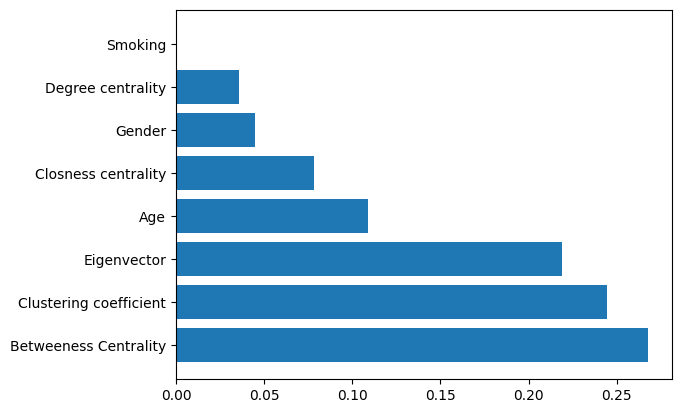

In [47]:
import matplotlib.pyplot as plt
# Calculate feature importances
importances = xgb.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Barplot: Add bars
plt.barh(range(X.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.yticks(range(X.shape[1]), names, fontsize = 10)
# Create plot title
#plt.title("Feature Importance")
plt.savefig('Figure7.png', dpi=300, bbox_inches = 'tight')

# Show plot
plt.show()

In [ ]:
####

In [48]:
import torch

import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.metrics import confusion_matrix, classification_report

from torch import nn, optim

import torch.nn.functional as F

In [49]:
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1:]

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [51]:
X_train = torch.from_numpy(X_train.to_numpy()).float()
y_train = torch.squeeze(torch.from_numpy(y_train.to_numpy()).float())

X_test = torch.from_numpy(X_test.to_numpy()).float()
y_test = torch.squeeze(torch.from_numpy(y_test.to_numpy()).float())

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

torch.Size([1644, 8]) torch.Size([1644])
torch.Size([412, 8]) torch.Size([412])


In [52]:
class Net(nn.Module):
  def __init__(self, n_features):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(n_features, 64)
    self.fc2 = nn.Linear(64, 128)
    self.fc3 = nn.Linear(128, 1)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    return torch.sigmoid(self.fc3(x))

net = Net(X_train.shape[1])
criterion = nn.BCELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [54]:
def calculate_accuracy(y_true, y_pred):
  predicted = y_pred.ge(.5).view(-1)
  return (y_true == predicted).sum().float() / len(y_true)

In [55]:
def round_tensor(t, decimal_places=4):
  return round(t.item(), decimal_places)

for epoch in range(4000):
  y_pred = net(X_train)
  y_pred = torch.squeeze(y_pred)

  train_loss = criterion(y_pred, y_train)

  if epoch % 100 == 0:
    train_acc = calculate_accuracy(y_train, y_pred)
    y_test_pred = net(X_test)
    y_test_pred = torch.squeeze(y_test_pred)
    test_loss = criterion(y_test_pred, y_test)
    test_acc = calculate_accuracy(y_test, y_test_pred)

    print("epoch {}\tloss : {}\t accuracy : {}".format(epoch,train_loss,train_acc))



  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()

print("Test accuracy : {}".format(test_acc))


epoch 0	loss : 0.6950936317443848	 accuracy : 0.4957420825958252
epoch 100	loss : 0.5275307297706604	 accuracy : 0.7524330615997314
epoch 200	loss : 0.4488246440887451	 accuracy : 0.790145993232727
epoch 300	loss : 0.42053666710853577	 accuracy : 0.8010948896408081
epoch 400	loss : 0.40528035163879395	 accuracy : 0.812652051448822
epoch 500	loss : 0.39498528838157654	 accuracy : 0.819343090057373
epoch 600	loss : 0.3867360055446625	 accuracy : 0.8181264996528625
epoch 700	loss : 0.38088297843933105	 accuracy : 0.8217761516571045
epoch 800	loss : 0.37559452652931213	 accuracy : 0.8205596208572388
epoch 900	loss : 0.3713049292564392	 accuracy : 0.8278588652610779
epoch 1000	loss : 0.3678814172744751	 accuracy : 0.8296837210655212
epoch 1100	loss : 0.3649345934391022	 accuracy : 0.8284671306610107
epoch 1200	loss : 0.3623911440372467	 accuracy : 0.8296837210655212
epoch 1300	loss : 0.36025741696357727	 accuracy : 0.8290753960609436
epoch 1400	loss : 0.3577999174594879	 accuracy : 0.830900

In [56]:
classes = ['Non T2DM', 'T2M']

y_pred = net(X_test)

y_pred = y_pred.ge(.5).view(-1)

print(classification_report(y_test, y_pred, target_names=classes, digits=4))

              precision    recall  f1-score   support

    Non T2DM     0.7965    0.8638    0.8288       213
         T2M     0.8398    0.7638    0.8000       199

    accuracy                         0.8155       412
   macro avg     0.8182    0.8138    0.8144       412
weighted avg     0.8174    0.8155    0.8149       412



In [57]:
y_pred = y_pred.detach().numpy()

#Keras DNN

In [58]:
from keras.models import Sequential
from keras.layers import Dense
import keras


In [59]:
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1:]

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [61]:
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

In [63]:
model = Sequential()
model.add(Dense(64, input_dim=8, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [64]:
opt = keras.optimizers.Adam(learning_rate=0.001)


In [65]:
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [66]:
model.fit(X_train, y_train, epochs=2000)

Epoch 1/2000
52/52 [==============================] - 1s 2ms/step - loss: 0.6718 - accuracy: 0.5797
Epoch 2/2000
52/52 [==============================] - 0s 2ms/step - loss: 0.6324 - accuracy: 0.6758
Epoch 3/2000
52/52 [==============================] - 0s 2ms/step - loss: 0.5991 - accuracy: 0.7135
Epoch 4/2000
52/52 [==============================] - 0s 3ms/step - loss: 0.5699 - accuracy: 0.7397
Epoch 5/2000
52/52 [==============================] - 0s 3ms/step - loss: 0.5450 - accuracy: 0.7433
Epoch 6/2000
52/52 [==============================] - 0s 3ms/step - loss: 0.5284 - accuracy: 0.7488
Epoch 7/2000
52/52 [==============================] - 0s 3ms/step - loss: 0.5178 - accuracy: 0.7439
Epoch 8/2000
52/52 [==============================] - 0s 3ms/step - loss: 0.5077 - accuracy: 0.7536
Epoch 9/2000
52/52 [==============================] - 0s 3ms/step - loss: 0.4976 - accuracy: 0.7622
Epoch 10/2000
52/52 [==============================] - 0s 3ms/step - loss: 0.4934 - accuracy: 0.7634

In [67]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.4f' % (accuracy*100))

13/13 [==============================] - 0s 2ms/step - loss: 0.5725 - accuracy: 0.7621
Accuracy: 76.2136


In [68]:
predictions = model.predict(X_test)
y_pred = (predictions > 0.5)

13/13 [==============================] - 0s 4ms/step


In [69]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))

[[162  51]
 [ 47 152]]
              precision    recall  f1-score   support

           0     0.7751    0.7606    0.7678       213
           1     0.7488    0.7638    0.7562       199

    accuracy                         0.7621       412
   macro avg     0.7619    0.7622    0.7620       412
weighted avg     0.7624    0.7621    0.7622       412



In [70]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [76]:
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
import eli5
from eli5.sklearn import PermutationImportance

def base_model():
  model = Sequential()
  model.add(Dense(64, input_dim=8, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  opt = keras.optimizers.Adam(learning_rate=0.001)
  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
  return model


model = KerasClassifier(build_fn=base_model)
model.fit(X_train, y_train, epochs=4000)


Epoch 1/4000


<ipython-input-76-64ec857c713c>:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=base_model)


Streaming output truncated to the last 5000 lines.
52/52 [==============================] - 0s 2ms/step - loss: 0.2875 - accuracy: 0.8692
Epoch 1502/4000
52/52 [==============================] - 0s 3ms/step - loss: 0.3038 - accuracy: 0.8516
Epoch 1503/4000
52/52 [==============================] - 0s 2ms/step - loss: 0.3002 - accuracy: 0.8552
Epoch 1504/4000
52/52 [==============================] - 0s 3ms/step - loss: 0.2953 - accuracy: 0.8625
Epoch 1505/4000
52/52 [==============================] - 0s 3ms/step - loss: 0.2925 - accuracy: 0.8595
Epoch 1506/4000
52/52 [==============================] - 0s 3ms/step - loss: 0.2909 - accuracy: 0.8662
Epoch 1507/4000
52/52 [==============================] - 0s 3ms/step - loss: 0.2956 - accuracy: 0.8717
Epoch 1508/4000
52/52 [==============================] - 0s 3ms/step - loss: 0.2928 - accuracy: 0.8619
Epoch 1509/4000
52/52 [==============================] - 0s 2ms/step - loss: 0.2943 - accuracy: 0.8650
Epoch 1510/4000
52/52 [===============

In [77]:
perm = PermutationImportance(model, random_state=1).fit(X_test,y_test)
eli5.show_weights(perm, feature_names = X.columns.tolist())

13/13 [==============================] - 0s 2ms/step - loss: 0.9224 - accuracy: 0.7888


Weight,Feature
0.1680 ± 0.0328,Eigenvector
0.0859 ± 0.0336,Degree centrality
0.0835 ± 0.0265,Clustering coefficient
0.0684 ± 0.0231,Closness centrality
0.0631 ± 0.0230,Age
0.0184 ± 0.0109,Betweeness Centrality
0.0078 ± 0.0078,Smoking
0.0029 ± 0.0277,Gender


In [78]:
eli5.show_weights(perm, feature_names = X.columns.tolist())

Weight,Feature
0.1680 ± 0.0328,Eigenvector
0.0859 ± 0.0336,Degree centrality
0.0835 ± 0.0265,Clustering coefficient
0.0684 ± 0.0231,Closness centrality
0.0631 ± 0.0230,Age
0.0184 ± 0.0109,Betweeness Centrality
0.0078 ± 0.0078,Smoking
0.0029 ± 0.0277,Gender


In [79]:
feature_important_nn = list(zip(feature_names, perm.feature_importances_))


# SNS plot


## NN

In [82]:
feature_important_nn = list(zip(feature_names, perm.feature_importances_))
feature_important_nn = pd.DataFrame(feature_important_nn,columns=['Feature','Weight'])
feature_important_nn['Model'] = 'ANN'

## LR

In [83]:
feature_important_lr = list(zip(feature_names, perm_LR.feature_importances_))
feature_important_lr = pd.DataFrame(feature_important_lr,columns=['Feature','Weight'])
feature_important_lr['Model'] = 'LR'

## KNN

In [84]:
feature_important_knn = list(zip(feature_names, perm_KNN.feature_importances_))
feature_important_knn = pd.DataFrame(feature_important_knn,columns=['Feature','Weight'])
feature_important_knn['Model'] = 'KNN'

## SVM

In [85]:
feature_important_svm = list(zip(feature_names, perm_SVM.feature_importances_))
feature_important_svm = pd.DataFrame(feature_important_svm,columns=['Feature','Weight'])
feature_important_svm['Model'] = 'SVM'

## NB

In [86]:
feature_important_nb = list(zip(feature_names, perm_NB.feature_importances_))
feature_important_nb = pd.DataFrame(feature_important_nb,columns=['Feature','Weight'])
feature_important_nb['Model'] = 'NB'

## DT

In [87]:
feature_important_dt = list(zip(feature_names, perm_DT.feature_importances_))
feature_important_dt = pd.DataFrame(feature_important_dt,columns=['Feature','Weight'])
feature_important_dt['Model'] = 'DT'

## RF

In [88]:
feature_important_rf = list(zip(feature_names, perm_RF.feature_importances_))
feature_important_rf = pd.DataFrame(feature_important_rf,columns=['Feature','Weight'])
feature_important_rf['Model'] = 'RF'

XGB

In [96]:
feature_important_xgb = list(zip(feature_names, perm_xgb.feature_importances_))
feature_important_xgb = pd.DataFrame(feature_important_xgb,columns=['Feature','Weight'])
feature_important_xgb['Model'] = 'XGB'

In [97]:
frames = [feature_important_lr, feature_important_knn, feature_important_svm, feature_important_nb, feature_important_dt, feature_important_rf, feature_important_xgb, feature_important_nn]
result = pd.concat(frames)

<ipython-input-98-450bd2764b27>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(x="Weight", y="Feature", col="Model",


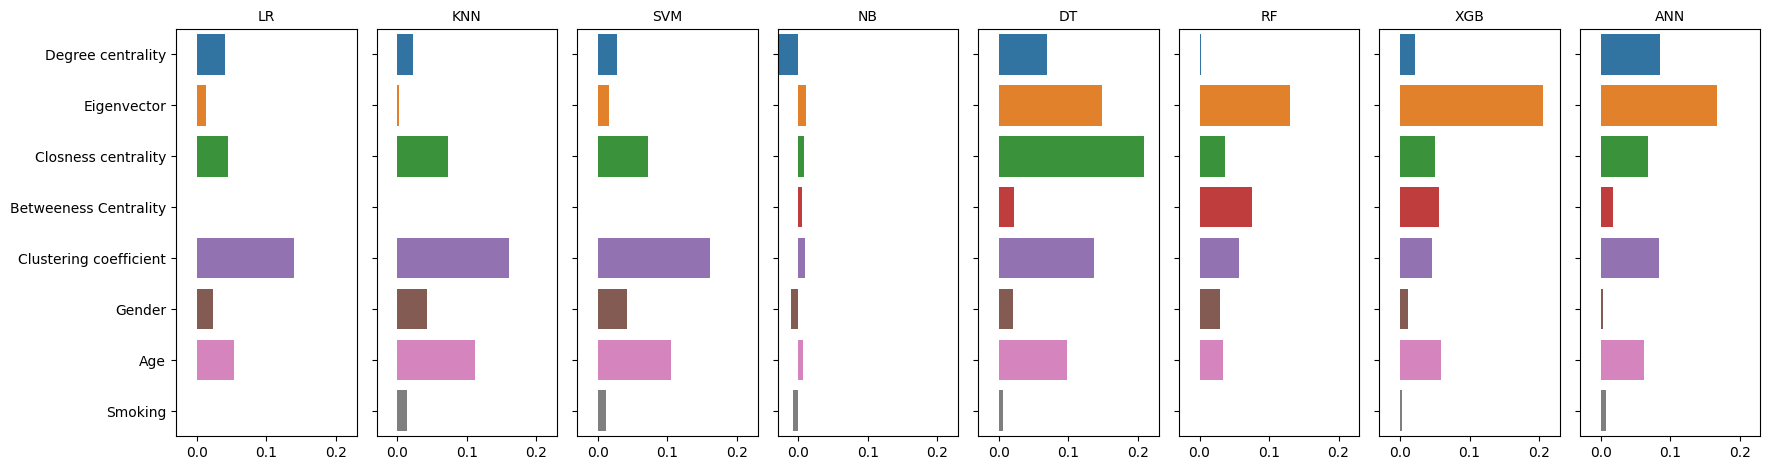

In [98]:
g = sns.catplot(x="Weight", y="Feature", col="Model",
                 data=result,
                kind="bar", ci=None, aspect=.45, )
(g.set_axis_labels("", "", )
  .set_titles("{col_name}")
  .despine(top=False, right=False, left=False, bottom=False)
  .set(xlim=(-0.03, 0.23))
  )


#AUC

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

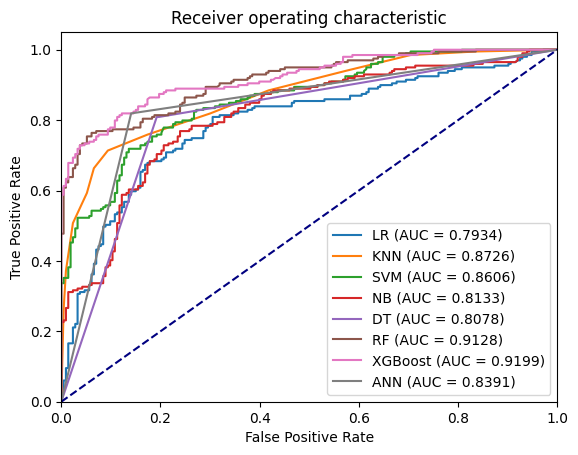

In [99]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


fpr, tpr, thresholds =roc_curve(y_test, y_pred)


y_pred_prob1 = KNN.predict_proba(X_test)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)

y_pred_prob2 = SVM.predict_proba(X_test)[:,1]
fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)


y_pred_prob3 = NB.predict_proba(X_test)[:,1]
fpr3 , tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3)

y_pred_prob4 = LR.predict_proba(X_test)[:,1]
fpr4 , tpr4, thresholds4 = roc_curve(y_test, y_pred_prob4)

y_pred_prob5 = RF.predict_proba(X_test)[:,1]
fpr5 , tpr5, thresholds5 = roc_curve(y_test, y_pred_prob5)

y_pred_prob6 = DT.predict_proba(X_test)[:,1]
fpr6 , tpr6, thresholds6 = roc_curve(y_test, y_pred_prob6)

y_pred_prob7 = xgb.predict_proba(X_test)[:,1]
fpr7 , tpr7, thresholds7 = roc_curve(y_test, y_pred_prob7)




roc_auc = auc(fpr, tpr)
roc_auc_knn = auc(fpr1, tpr1)
roc_auc_svm = auc(fpr2, tpr2)
roc_auc_nb = auc(fpr3, tpr3)
roc_auc_lr = auc(fpr4, tpr4)
roc_auc_rf = auc(fpr5, tpr5)
roc_auc_dt = auc(fpr6, tpr6)
roc_auc_xgb = auc(fpr7, tpr7)


plt.figure()
plt.plot(fpr4, tpr4, label='LR (AUC = %0.4f)' % roc_auc_lr)
plt.plot(fpr1, tpr1, label='KNN (AUC = %0.4f)' % roc_auc_knn)
plt.plot(fpr2, tpr2, label='SVM (AUC = %0.4f)' % roc_auc_svm)
plt.plot(fpr3, tpr3, label='NB (AUC = %0.4f)' % roc_auc_nb)
plt.plot(fpr6, tpr6, label='DT (AUC = %0.4f)' % roc_auc_dt)
plt.plot(fpr5, tpr5, label='RF (AUC = %0.4f)' % roc_auc_rf)
plt.plot(fpr7, tpr7, label='XGBoost (AUC = %0.4f)' % roc_auc_xgb)
plt.plot(fpr, tpr, label='ANN (AUC = %0.4f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC.png', dpi=300, bbox_inches = 'tight')
plt.show()
